In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
import seaborn as sb
import warnings 

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

matplotlib.style.use('ggplot')

np.random.seed(42)

In [3]:
train_df = pd.read_csv("drive/MyDrive/ST4248/data/resale_train_feature_selection.csv")
test_df = pd.read_csv("drive/MyDrive/ST4248/data/resale_test_feature_selection.csv")

# Price

## Data Check

In [4]:
X_train = train_df.drop("resale_price", axis = 1)
X_test = test_df.drop("resale_price", axis = 1)

y_train = train_df["resale_price"]
y_test = test_df["resale_price"]

In [5]:
X_train.head()

,floor_area_sqm,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,...,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,-1.132448,-0.676490,-0.443615,-1.143025,-0.193241,-0.050572,-0.044588,1.693641,-0.459028,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,-2.010290,0.201327,1.252320,1.352967,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,1.166660,-0.384369,-0.198538,-0.290599,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,0.372423,1.731095,1.252320,-0.613741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
4,-0.087399,1.054745,1.291532,0.857112,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,1.842152,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507


In [6]:
X_test.head()

,floor_area_sqm,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,...,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,-0.212805,0.004724,1.291532,1.224825,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,-0.087399,1.306314,0.242602,1.403110,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,0.038007,-0.341318,0.644528,-0.808741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,1.842152,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,0.748640,1.265904,1.291532,1.386396,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
4,-0.547221,-0.978913,0.036737,-1.209882,-0.193241,-0.050572,-0.044588,1.693641,-0.459028,-0.542843,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507


## Make the Deep Neural Network
 * Define a sequential model
 * Add some dense layers
 * Use '**relu**' as the activation function in the hidden layers
 * Use a '**normal**' initializer as the kernal_intializer 
           Initializers define the way to set the initial random weights of Keras layers.
 * We will use mean_absolute_error as a loss function
 * Define the output layer with only one node
 * Use 'linear 'as the activation function for the output layer
 


In [7]:
NN_model = Sequential()

**The Input Layer**

In [8]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

**The Hidden Layers**

In [9]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

**The Output Layer**

In [10]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

**Compile the network**

In [11]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9600      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 174,465
Trainable params: 174,465
Non-trainable params: 0
_________________________________________________________________


**Define a checkpoint callback :**

In [12]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

## Train the model :

In [13]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
87/89 [============================>.] - ETA: 0s - loss: 542214.7500 - mean_absolute_error: 542214.7500
Epoch 1: val_loss improved from inf to 427010.40625, saving model to Weights-001--427010.40625.hdf5
89/89 [==============================] - 3s 14ms/step - loss: 540692.5625 - mean_absolute_error: 540692.5625 - val_loss: 427010.4062 - val_mean_absolute_error: 427010.4062
Epoch 2/500
88/89 [============================>.] - ETA: 0s - loss: 145862.0312 - mean_absolute_error: 145862.0312
Epoch 2: val_loss improved from 427010.40625 to 67819.64062, saving model to Weights-002--67819.64062.hdf5
89/89 [==============================] - 1s 7ms/step - loss: 145620.1562 - mean_absolute_error: 145620.1562 - val_loss: 67819.6406 - val_mean_absolute_error: 67819.6406
Epoch 3/500
81/89 [==========================>...] - ETA: 0s - loss: 56517.3594 - mean_absolute_error: 56517.3594
Epoch 3: val_loss improved from 67819.64062 to 50547.55859, saving model to Weights-003--50547.55859.hdf5


## Test the model

In [14]:
y_train_pred = NN_model.predict(X_train)
y_test_pred = NN_model.predict(X_test)

28/28 [==============================] - 0s 3ms/step


In [15]:
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

In [16]:
train_n = X_train.shape[0]
train_p = X_train.shape[1]
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [17]:
test_n = X_test.shape[0]
test_p = X_test.shape[1]
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [18]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 3.11%
Train RMSE: 27133.811856856406
Train R2: 0.9743566936776727
Train Adj R2: 0.9738071412108751

Test MAPE: 5.30%
Test RMSE: 43526.44345815741
Test R2: 0.930602326786164
Test Adj R2: 0.9242387235422682


## Plots

In [19]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

Text(0.5, 1.0, 'Residual Plot')

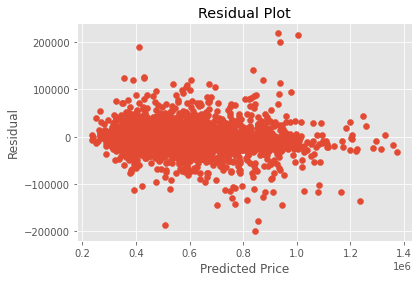

In [20]:
plt.scatter(y_train_pred, train_residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Actual vs Predicted Price')

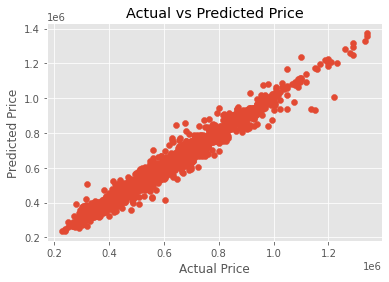

In [21]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

Text(0.5, 1.0, 'Residual Plot')

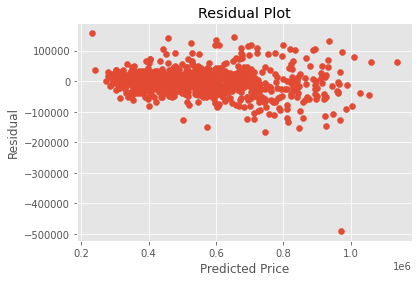

In [22]:
plt.scatter(y_test_pred, test_residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Actual vs Predicted Price')

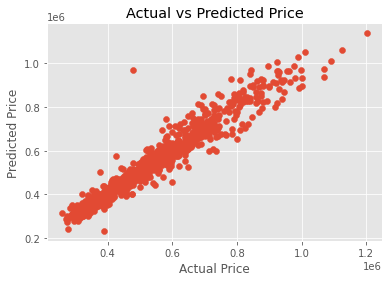

In [23]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

# Price / Sqm

## Data Check

In [24]:
train_df2 = train_df.copy()
test_df2 = test_df.copy()

train_df2["floor_area_sqm"] = train_df2["floor_area_sqm"].apply(lambda x : x * 23.922319549360488 + 95.09078798185942)
test_df2["floor_area_sqm"] = test_df2["floor_area_sqm"].apply(lambda x : x * 23.922319549360488 + 95.09078798185942)

train_df2["resale_price_per_sqm"] = train_df2["resale_price"] / train_df2["floor_area_sqm"]
test_df2["resale_price_per_sqm"] = test_df2["resale_price"] / test_df2["floor_area_sqm"]

In [25]:
X_train = train_df2.drop(["resale_price_per_sqm", "resale_price", "floor_area_sqm"], axis = 1)
X_test = test_df2.drop(["resale_price_per_sqm", "resale_price", "floor_area_sqm"], axis = 1)

y_train = train_df2["resale_price_per_sqm"]
y_test = test_df2["resale_price_per_sqm"]

In [26]:
X_train.head()

,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,-0.676490,-0.443615,-1.143025,-0.193241,-0.050572,-0.044588,1.693641,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,0.201327,1.252320,1.352967,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,-0.384369,-0.198538,-0.290599,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,1.731095,1.252320,-0.613741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
4,1.054745,1.291532,0.857112,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,1.842152,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507


In [27]:
X_test.head()

,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,0.004724,1.291532,1.224825,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,1.306314,0.242602,1.403110,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,-0.341318,0.644528,-0.808741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,1.842152,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,1.265904,1.291532,1.386396,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
4,-0.978913,0.036737,-1.209882,-0.193241,-0.050572,-0.044588,1.693641,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507


## Make the Deep Neural Network
 * Define a sequential model
 * Add some dense layers
 * Use '**relu**' as the activation function in the hidden layers
 * Use a '**normal**' initializer as the kernal_intializer 
           Initializers define the way to set the initial random weights of Keras layers.
 * We will use mean_absolute_error as a loss function
 * Define the output layer with only one node
 * Use 'linear 'as the activation function for the output layer
 


In [28]:
NN_model = Sequential()

**The Input Layer**

In [29]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

**The Hidden Layers**

In [30]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

**The Output Layer**

In [31]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

**Compile the network**

In [32]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               9472      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 174,337
Trainable params: 174,337
Non-trainable params: 0
_________________________________________________________________


**Define a checkpoint callback :**

In [33]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

## Train the model :

In [34]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
83/89 [==========================>...] - ETA: 0s - loss: 3645.4592 - mean_absolute_error: 3645.4592
Epoch 1: val_loss improved from inf to 699.48254, saving model to Weights-001--699.48254.hdf5
89/89 [==============================] - 2s 9ms/step - loss: 3471.7070 - mean_absolute_error: 3471.7070 - val_loss: 699.4825 - val_mean_absolute_error: 699.4825
Epoch 2/500
85/89 [===========================>..] - ETA: 0s - loss: 522.7350 - mean_absolute_error: 522.7350
Epoch 2: val_loss improved from 699.48254 to 435.08951, saving model to Weights-002--435.08951.hdf5
89/89 [==============================] - 1s 6ms/step - loss: 521.6706 - mean_absolute_error: 521.6706 - val_loss: 435.0895 - val_mean_absolute_error: 435.0895
Epoch 3/500
86/89 [===========================>..] - ETA: 0s - loss: 424.9319 - mean_absolute_error: 424.9319
Epoch 3: val_loss improved from 435.08951 to 413.66296, saving model to Weights-003--413.66296.hdf5
89/89 [==============================] - 1s 6ms/step -

## Test the model

In [35]:
y_train_pred = NN_model.predict(X_train)
y_test_pred = NN_model.predict(X_test)

28/28 [==============================] - 0s 2ms/step


In [36]:
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

In [37]:
y_train = y_train * train_df2["floor_area_sqm"]
y_train_pred = y_train_pred * train_df2["floor_area_sqm"]

In [38]:
y_test = y_test * test_df2["floor_area_sqm"]
y_test_pred = y_test_pred * test_df2["floor_area_sqm"]

In [39]:
train_n = X_train.shape[0]
train_p = X_train.shape[1]
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [40]:
test_n = X_test.shape[0]
test_p = X_test.shape[1]
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [41]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 2.62%
Train RMSE: 24825.28926661958
Train R2: 0.9785344986231573
Train Adj R2: 0.9780808270538147

Test MAPE: 5.71%
Test RMSE: 44579.44500686539
Test R2: 0.9272039424792416
Test Adj R2: 0.9206270709458068


In [42]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

## Plots

Text(0.5, 1.0, 'Residual Plot')

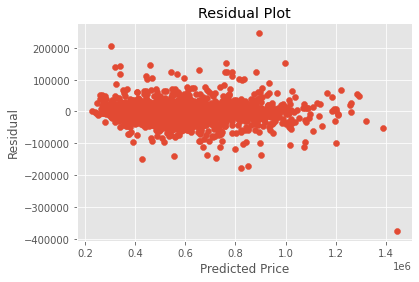

In [43]:
#idk residual plot is vs predicted value or actual value lol
plt.scatter(y_train_pred, train_residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

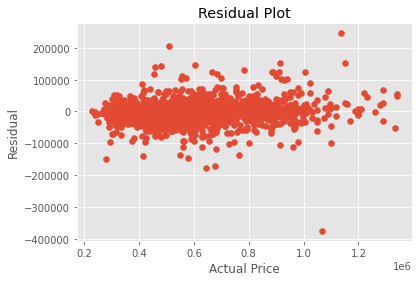

In [44]:
plt.scatter(y_train, train_residuals)
plt.xlabel("Actual Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Actual vs Predicted Price')

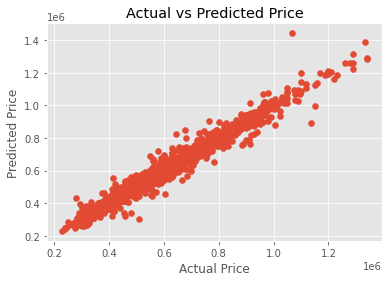

In [45]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

Text(0.5, 1.0, 'Residual Plot')

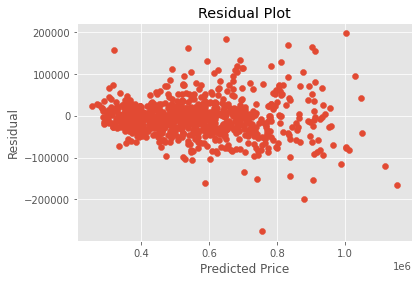

In [46]:
plt.scatter(y_test_pred, test_residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Actual vs Predicted Price')

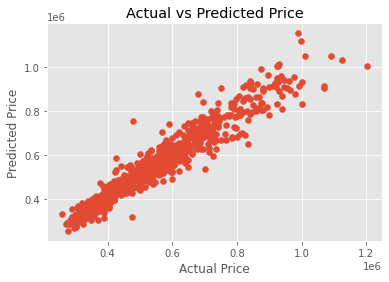

In [47]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")